# Time series ananlysis

## Aim: Use the past data inorder to predict the future values

### step to follow to deal with tame series 
- 1. Import the data
- 2. Check for the missing values
- 3. Info- if its not in the datatime, make it to this format 
- 4. Replace these missing values values - ffill, bfill, rollingmean
- 5. Plot the series - Trend, seasonalality, cyclicity
- 6. check for stationarity- visualization(difficult task), statistical test(ADF, KPSS)

#### ADF : H0: If unit root is present (Data is not stationary), H1: Unit root is not present(Data is stationary)
    - pvalue < 0.05 => The series is stationary
    
#### KPSS: H0: The data is stationary, H1: Data is not stationary
    - pvalue < 0.05 => The series is not stationary
    
- 7. If the data is not stationary - convet the non stationary data into stationary data
    - Differencing (substracting) [y(t)=y(t)-y(t-1)]
    - seasonal differencing {y(t)=y(t)-y(t-n)}

- 8. Model the data
    - a. ARIMA model
        - AR (Autoregrassion component):p: Plotting ACF(auto correlation function) and PACF (Partial auto correlation function) 
        - Integrated : d
        - MA (Moving average): (p, d, q) p: pvalue; d: differencing;  
        - (p, d, q) = (1, 1, 0)-first order; (0, 1, 1); (1,1,1)
        
- ARIMA is presented as (p,d,q)

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_excel('F:\Skillenable\Data frames\Data (1).xlsx')

In [3]:
df.head()

,DATE,Product
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [4]:
## Renaming column
df.rename(columns={'DATE':'Date', 'Product':'Production'}, inplace= True)

In [5]:
df.shape

(577, 2)

In [6]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        577 non-null    datetime64[ns]
 1   Production  577 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.1 KB


In [7]:
# Converting to datetime without persing

df['Date'] = pd.to_datetime(df.Date)

In [8]:
# set index
df.set_index('Date', inplace= True)

Text(0, 0.5, 'Production')

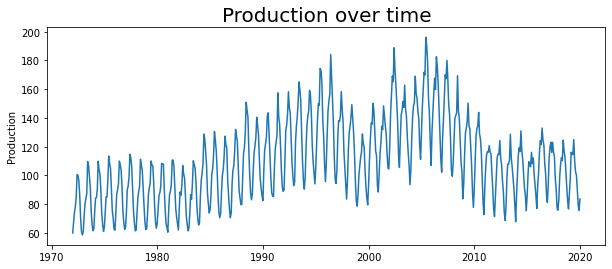

In [9]:
plt.figure(figsize=(10,4))
plt.plot(df.Production)
plt.title('Production over time', fontsize = 20)
plt.ylabel('Production')

In [10]:
### ADF test for stationarity

result = adfuller(df['Production'])

In [11]:
result

(-1.75800877551055,
 0.4014992899407579,
 19,
 557,
 {'1%': -3.4421447800270673,
  '5%': -2.8667429272780858,
  '10%': -2.5695409929766093},
 3284.760793628813)

In [14]:
print(f'Test statistics: {result[0]}')
print(f'p value: {result[1]}')
print(f'critical values: {result[4]}')

if result[1] < 0.05:
    print("Series is stationary.")
else:
    print("Series is non stationary.")

Test statistics: -1.75800877551055
p value: 0.4014992899407579
critical values: {'1%': -3.4421447800270673, '5%': -2.8667429272780858, '10%': -2.5695409929766093}
Series is non stationary.


In [15]:
# As series is non stationary we will perform Differencing inorder to convert the series into stationary series.


In [16]:
df1 = df['Production']-df['Production'].shift(1)
df1

Date
1972-01-01        NaN
1972-02-01     7.0983
1972-03-01     7.1745
1972-04-01     3.8770
1972-05-01     6.6516
               ...   
2019-09-01    -2.4344
2019-10-01   -10.0057
2019-11-01   -10.4461
2019-12-01    -4.0129
2020-01-01     7.9196
Name: Production, Length: 577, dtype: float64

<AxesSubplot:xlabel='Date'>

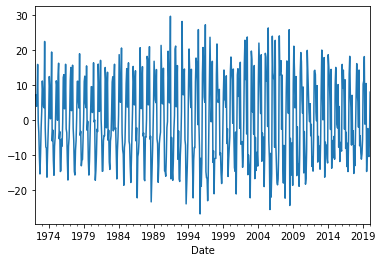

In [17]:
df1.dropna().plot()

In [18]:
# We can perform differencing by another method
df_diff = df['Production'].diff()       # easier way to do differencing
df_diff

Date
1972-01-01        NaN
1972-02-01     7.0983
1972-03-01     7.1745
1972-04-01     3.8770
1972-05-01     6.6516
               ...   
2019-09-01    -2.4344
2019-10-01   -10.0057
2019-11-01   -10.4461
2019-12-01    -4.0129
2020-01-01     7.9196
Name: Production, Length: 577, dtype: float64

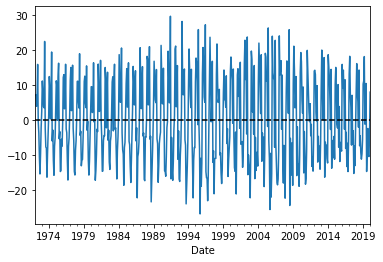

In [21]:
df_diff.dropna().plot()
plt.axhline(0, linestyle = '--', color= 'k')

In [30]:
# again perform ADF test to proove stationarity

result_diff = adfuller(df_diff.dropna())
result_diff

(-6.6279575425484,
 5.8116215620563e-09,
 19,
 556,
 {'1%': -3.4421660928041633,
  '5%': -2.8667523104859627,
  '10%': -2.56954599309042},
 3279.4050800038817)

In [31]:
print(f'Test statistics: {result_diff[0]}')
print(f'p value: {result_diff[1]}')
print(f'critical values: {result_diff[4]}')

if result_diff[1] < 0.05:
    print("Series is stationary.")
else:
    print("Series is non stationary.")

Test statistics: -6.6279575425484
p value: 5.8116215620563e-09
critical values: {'1%': -3.4421660928041633, '5%': -2.8667523104859627, '10%': -2.56954599309042}
Series is stationary.


# ACF & PACF

### Time series lag
    - eg1 : original data: 21,22,21,23,19
    - Time series lagged by 1 : 22,21,23,19  (series start from 2nd element of original data)
    
    - Eg2 : 123456
    - 23456 : lagged by 1
    - 3456 : lagged by 2

### Find the relation between the original data and lagged data

## ACF: A functin which gives you the values of auto-correlation of any series with it's lagged value
    - Describes how well our present value is related to the past value
    

## PACF:  An indirect function to find the auto correlation after removing the relationship expalined by previous lags
    
    - insted of finding the correlation with present lags, it find the correlation of residuals.
    - if there are any hidden information the PACF takes this into account.
    - 

In [37]:
# import req libraries to plot ACF & PACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [33]:
# subset the data from 2010 onward
start_date = pd.to_datetime('2010-01-01')
df_new = df[start_date:]

In [34]:
df_new.head()

,Production
Date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


In [35]:
df_new.shape

(121, 1)

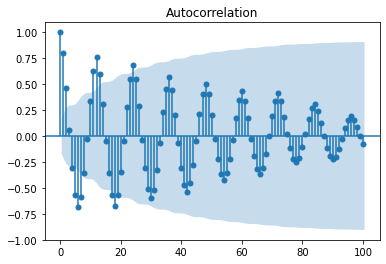

In [40]:
#ploting ACF
acf_plot = plot_acf(df_new.Production, lags= 100) # randomly choose lag
            # If you don't choose lag it'll randomly choose the lag value
    # Finding correlation with the past 100 units
    

In [ ]:
##### AR model the ACF plot decline/damping/getting smaller and smaller/deminishing

##### Based on the decaying ACF plot we can say that we are dealing with an AR process

##### X axis- Lags
####  Y axis- correlation (ranging from -1 to 1)

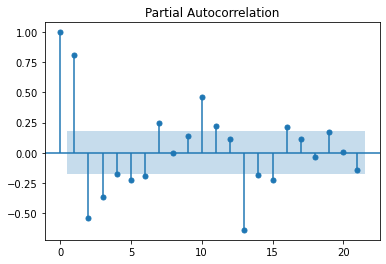

In [41]:
### PACF plot
pacf_plot = plot_pacf(df_new.Production)

In [42]:
## Strong lags at 1, 

## AR & MA 

### AR model
- AR model suitable: data without trend and seasonality
- AR model is used for predicting the next timestamps by regrassing the previous values
- 

- Regration: Finding relationship


- AR model of order 1 is given by:  y(t) = B*Y(t-1) + C + Error(t)

### MA model

- MA model is used to forcast the future values by averaging the past value
- MA model use previous error to make future predictions.

- y(t) = Mean + B * Error(t-1) + Error(t)

## Integrated
- When the data is not stationary, we perform some differencing 
- How much we difference the data in order to make it stationary